Ідеальні дані бувають лише теоретично. Насправді немає наборів без пропущених чи некоректних значень. Відповідати на запитання "Хто в цьому винен?" марно, тому у цьому розділі ми торкнемося лише питання “Що з цим робити?

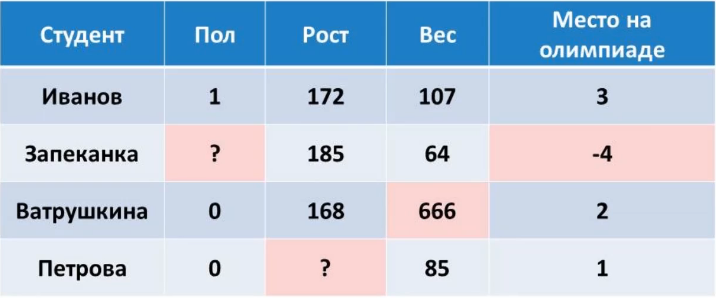

формальна процедура для відновлення значень у клітинках

Шляхи боротьби:
    1. Видалити строку
    2. Видалити стовпець
    3. Замінити значення в осередку на середнє (медіану, моду...) із значень стовпця
    4. Для номінальних значень можливо вставити моду
    5. Для номінальних значень можливо сгенерувати дані з певною вірогідність (що зустрічається в заповнених даних)

https://stepik.org/lesson/83189/step/3?unit=59825

Що таке метрика? (Це узагальнення поняття відстані геометрії.)

1. може бути обчислена для об'єктів довільної природи;
2. має обчислюватися за відомою формулою зі шкільного підручника геометрії.

Дано два набори
$P = (p_1, p_2, p_3, ..., p_n)$ та $Q = (q_1, q_2, q_3, ..., q_n)$  
Як знайти відстань між Р та О?


1. [Евклідова метрика](https://uk.wikipedia.org/wiki/Евклідова_відстань) :
${\sqrt {(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+\ldots +(p_{n}-q_{n})^{2}}}={\sqrt {\sum _{i=1}^{n}(p_{i}-q_{i})^{2}}}$

2. [Мангеттенська метрика](https://uk.wikipedia.org/wiki/Мангеттенська_метрика) :
${\displaystyle d_{1}(\mathbf {p} ,\mathbf {q} )=\|\mathbf {p} -\mathbf {q} \|_{1}=\sum _{i=1}^{n}|p_{i}-q_{i}|}$

3. Max-метрика :
$max(|p_{1}-q_{1}|, |p_{2}-q_{2}|, ..., |p_{n}-q_{n}|)$

# Завдання

Необхідно розрахувати відстань від об'єкта А до інших об'єктів таблиці для того, щоб знайти об'єкти, що найбільш близько розташовані до об'єкта А.
Тоді значення ознаки Р з найближчих об'єктів можна взяти значення ознаки Р об'єкта А.

In [1]:
import pandas as pd
import numpy as np
from numpy import NaN

# Создадим датафрейм с пропущенным значением признака Р для объекта А
df = pd.DataFrame({'P1':[3,5,4,5], 'P2':[4,5,3,4], 'P3':[5,5,3,3], 'P4':[3,4,2,3], 'P':[4,3,5,NaN]}, index=['A1', 'A2', 'A3', 'A'])

# Посчитаем метрики
dict_metrics = {'A1':[], 'A2':[], 'A3':[]}
for i in df.index[:-1]:
    dict_metrics[i].append(np.power((df.loc['A'][:-1]-df.loc[i][:-1]).pow(2).sum(), 0.5).round(2)) # считаем Евклидово расстояние
    dict_metrics[i].append((df.loc['A'][:-1]-df.loc[i][:-1]).abs().sum()) # считаем Манхэттеновское расстояние
    dict_metrics[i].append((df.loc['A'][:-1]-df.loc[i][:-1]).abs().max()) # считаем max-метрику

metrics = pd.DataFrame(dict_metrics, index=['Euclid', 'Manhatten', 'Max'])

# Считаем варианты значений для каждой метрики
dict_value = {'Euclid':[], 'Manhatten':[], 'Max':[]}
for i in metrics.index:
    norm_mul = (1/((1/metrics.loc[i]).sum())) # нормирующий множитель
    similarity = ((df.loc[:]['P'][:-1]/metrics.loc[i]).sum()) # значение признака * мера близости(=величина, обратно пропорциональная мере расстояния)
    value_P = (norm_mul*similarity).round(2)
    dict_value[i].append(value_P)
    print(f'значение признака P для А по метрике {i}: {value_P}')

значение признака P для А по метрике Euclid: 4.13
значение признака P для А по метрике Manhatten: 4.1
значение признака P для А по метрике Max: 4.25


In [20]:
# !pip install neulab

In [19]:
from neulab.RestoreValue import MetricRestore

# d = {'P1': [3, 5, 4, 5], 'P2': [4, 5, 3, 4], 'P3': [5, 5, 3, 3], 'P4': [3, 4, 2, 3], 'P5': [4, 3, 5, np.NaN]}
# df = pd.DataFrame(data=d)
df = df.reset_index().drop('index', axis=1)
# Euclid
euclid_m = MetricRestore(df, row_start=0, row_end=9, metric='euclid')
# Manhattan
mnht_m = MetricRestore(df, row_start=0, row_end=9, metric='manhattan')
# Max
mx_m = MetricRestore(df, row_start=0, row_end=9, metric='max')
print(f'{euclid_m=} {mnht_m=} {mx_m=}')

euclid_m=4.17 mnht_m=4.15 mx_m=4.27


C:\Users\GbreH\Desktop\SQL-training\lib\site-packages\neulab\RestoreValue.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  inds_row = df.loc[pd.isna(df).any(1), :].index[0] # Find where is None value (row)
C:\Users\GbreH\Desktop\SQL-training\lib\site-packages\neulab\RestoreValue.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  inds_row = df.loc[pd.isna(df).any(1), :].index[0] # Find where is None value (row)
C:\Users\GbreH\Desktop\SQL-training\lib\site-packages\neulab\RestoreValue.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  inds_row = df.loc[pd.isna(df).any(1), :].index[0] # Find where is None value (row)


In [22]:
df = pd.DataFrame({'bust':[99,89,91,91,86,97,NaN], # груди
              'waidt':[56,58,64,51,56,53,51], # талія
              'hips':[91,89,91,91,84,86,91], # стегна
              'height':[160,157,165,170,157,175,165], # Зрсіт
              'weight':[58,48,54,54,44,56,54]}, index=['W1','W2','W3','W4','W5','W6','W7']) # вага

Видаляємо рядок з пропущеним значенням та проводимо отримуємо значення кореляції Пірсона

In [27]:
df.drop('W7', axis=0).corr()['bust']

bust      1.000000
waidt    -0.219903
hips      0.342287
height    0.457826
weight    0.906844
Name: bust, dtype: float64

In [23]:
df.corr()

,bust,waidt,hips,height,weight
bust,1.000000,-0.219903,0.342287,0.457826,0.906844
waidt,-0.219903,1.000000,0.063066,-0.397237,-0.166966
hips,0.342287,0.063066,1.000000,0.085615,0.617748
height,0.457826,-0.397237,0.085615,1.000000,0.607343
weight,0.906844,-0.166966,0.617748,0.607343,1.000000
